<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Carlos Daniel Pérez Hernández

**Fecha:** 28 de enero del 2021.

**Expediente** : if722627
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 9: Clase: 30

## Valuación opciones

> Utilizar lo visto en la **Clase22_Valuación Opciones** para simular precios y encontrar la prima de opciones tipo "put"

# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y compararlo con el valor teórico de la ecuación de Black-Scholes

#### ``Carlos Daniel Pérez Hernández``

In [33]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
from datetime import date
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

####### Calculation of log-returns
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()

In [3]:
#Obtener closes de McDonalds

closes = get_adj_closes(['MCD'], '2017-01-01')
closes_mcd = closes.loc[:,'MCD']
closes_mcd

Date
2017-01-03    107.689
2017-01-04    107.563
2017-01-05    107.761
2017-01-06    108.715
2017-01-09    108.418
               ...   
2021-05-03    235.560
2021-05-04    233.860
2021-05-05    235.040
2021-05-06    234.860
2021-05-07    234.840
Name: MCD, Length: 1094, dtype: float64

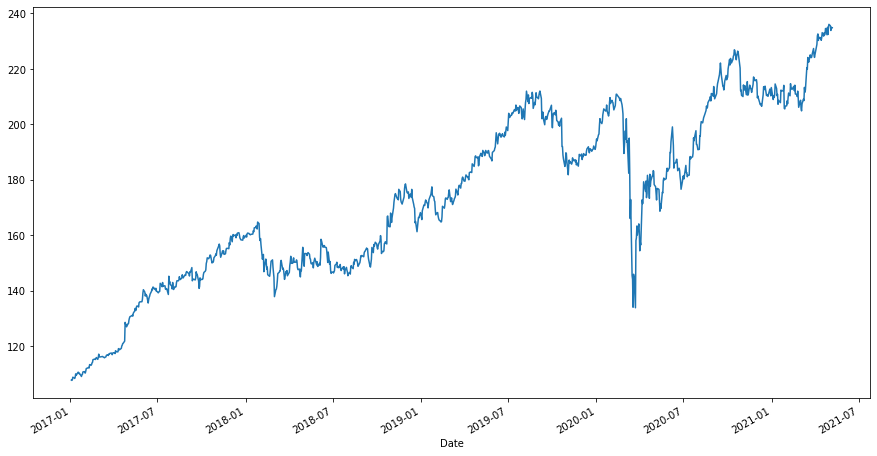

In [5]:
closes_mcd.plot(figsize=(15,8));

In [8]:
#Último Precio de cierre ajustado

closes_mcd[-1]

234.83999633789062

In [11]:
#Calculamos los rendimeintos diarios

ret_mcd = calc_daily_ret(closes_mcd)
ret_mcd

Date
2017-01-04   -1.171e-03
2017-01-05    1.840e-03
2017-01-06    8.816e-03
2017-01-09   -2.736e-03
2017-01-10   -1.496e-03
                ...    
2021-05-03   -2.205e-03
2021-05-04   -7.243e-03
2021-05-05    5.033e-03
2021-05-06   -7.661e-04
2021-05-07   -8.518e-05
Name: MCD, Length: 1093, dtype: float64

In [12]:
#Descargamos datos de opciones de McDonalds

pd.set_option('display.max_rows', 10)

mcd = web.YahooOptions('MCD')
mcd_opt = mcd.get_all_data().reset_index()
mcd_opt.set_index('Expiry').sort_index()#.head(1000)

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-05-14,215.0,put,MCD210514P00215000,...,2021-05-07 20:00:03,2021-05-07 19:33:19,"{'contractSymbol': 'MCD210514P00215000', 'stri..."
2021-05-14,230.0,call,MCD210514C00230000,...,2021-05-07 20:00:03,2021-05-07 19:56:34,"{'contractSymbol': 'MCD210514C00230000', 'stri..."
2021-05-14,230.0,put,MCD210514P00230000,...,2021-05-07 20:00:03,2021-05-07 19:25:16,"{'contractSymbol': 'MCD210514P00230000', 'stri..."
2021-05-14,232.5,call,MCD210514C00232500,...,2021-05-07 20:00:03,2021-05-07 19:26:24,"{'contractSymbol': 'MCD210514C00232500', 'stri..."
2021-05-14,232.5,put,MCD210514P00232500,...,2021-05-07 20:00:03,2021-05-07 19:57:15,"{'contractSymbol': 'MCD210514P00232500', 'stri..."
...,...,...,...,...,...,...,...
2023-01-20,125.0,call,MCD230120C00125000,...,2021-05-07 20:00:03,2021-04-05 15:02:46,"{'contractSymbol': 'MCD230120C00125000', 'stri..."
2023-01-20,125.0,put,MCD230120P00125000,...,2021-05-07 20:00:03,2021-05-03 19:41:42,"{'contractSymbol': 'MCD230120P00125000', 'stri..."
2023-01-20,180.0,put,MCD230120P00180000,...,2021-05-07 20:00:03,2021-04-29 16:35:27,"{'contractSymbol': 'MCD230120P00180000', 'stri..."


In [27]:
mcd_opt.loc[mcd_opt.Expiry.apply(lambda x: (x.year == 2021) and (x.month == 12))]

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
55,120.0,2021-12-17,call,...,2021-05-07 20:00:03,2021-05-03 14:39:04,"{'contractSymbol': 'MCD211217C00120000', 'stri..."
74,130.0,2021-12-17,put,...,2021-05-07 20:00:03,2021-04-21 13:30:02,"{'contractSymbol': 'MCD211217P00130000', 'stri..."
91,140.0,2021-12-17,put,...,2021-05-07 20:00:03,2021-05-07 13:32:46,"{'contractSymbol': 'MCD211217P00140000', 'stri..."
102,145.0,2021-12-17,put,...,2021-05-07 20:00:03,2021-04-20 13:30:02,"{'contractSymbol': 'MCD211217P00145000', 'stri..."
114,150.0,2021-12-17,put,...,2021-05-07 20:00:03,2021-04-26 18:33:42,"{'contractSymbol': 'MCD211217P00150000', 'stri..."
...,...,...,...,...,...,...,...
517,270.0,2021-12-17,call,...,2021-05-07 20:00:03,2021-05-04 13:55:28,"{'contractSymbol': 'MCD211217C00270000', 'stri..."
535,280.0,2021-12-17,call,...,2021-05-07 20:00:03,2021-05-03 13:30:02,"{'contractSymbol': 'MCD211217C00280000', 'stri..."
547,290.0,2021-12-17,call,...,2021-05-07 20:00:03,2021-04-30 14:37:49,"{'contractSymbol': 'MCD211217C00290000', 'stri..."
555,300.0,2021-12-17,call,...,2021-05-07 20:00:03,2021-04-23 15:29:04,"{'contractSymbol': 'MCD211217C00300000', 'stri..."


In [28]:
#la opción que deseo evaluar es

opt_deseada = mcd_opt.loc[(mcd_opt.Type=='put') & (mcd_opt.Strike==145) & (mcd_opt.Expiry=='2021-12-17')]
opt_deseada

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
102,145.0,2021-12-17,put,...,2021-05-07 20:00:03,2021-04-20 13:30:02,"{'contractSymbol': 'MCD211217P00145000', 'stri..."


In [29]:
#Información de la opcion deseada

opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar

Strike                                                            145
Expiry                                            2021-12-17 00:00:00
Type                                                              put
Symbol                                             MCD211217P00145000
Last                                                              0.8
                                          ...                        
Underlying                                                        MCD
Underlying_Price                                                  235
Quote_Time                                        2021-05-07 20:00:03
Last_Trade_Date                                   2021-04-20 13:30:02
JSON                {'contractSymbol': 'MCD211217P00145000', 'stri...
Name: 102, Length: 19, dtype: object

In [30]:
opt_valuar['JSON']

{'contractSymbol': 'MCD211217P00145000',
 'strike': 145.0,
 'currency': 'USD',
 'lastPrice': 0.8,
 'change': 0.0,
 'percentChange': 0.0,
 'openInterest': 3,
 'bid': 0.49,
 'ask': 0.91,
 'contractSize': 'REGULAR',
 'expiration': 1639699200,
 'lastTradeDate': 1618925402,
 'impliedVolatility': 0.3591372680664062,
 'inTheMoney': False}

### Simular Precios

In [56]:
sigma = ret_mcd.std()
r = (0.06)/360

In [57]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_mcd.iloc[-1]
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

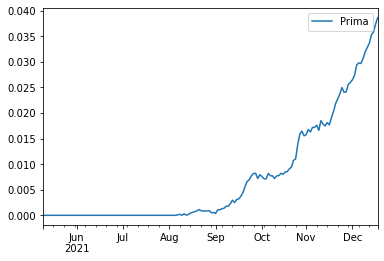

In [58]:
strike = K
put = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike - sim_closes, 0).mean(axis=1)}, index=dates)
call.plot();

In [59]:
call.iloc[-1]

Prima    0.039
Name: 2021-12-17 00:00:00, dtype: float64

In [60]:
#Intervalo de confianza

confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(-0.8994878908053026, 0.9767878367395595)


### Calcular rendimientos con histograma

In [61]:
# Centro mis datos en mi tasa libre de riesgo
mu = ret_mcd.mean()
freq, values = np.histogram(ret_mcd - mu + r, bins=10000)
# freq = freq.astype('float32')
prob = freq/np.sum(freq)

In [62]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_mcd.iloc[-1]

ret = np.random.choice(values[1:], (ndays,nscen), p=prob)
sim_ret_hist = pd.DataFrame(ret, index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())

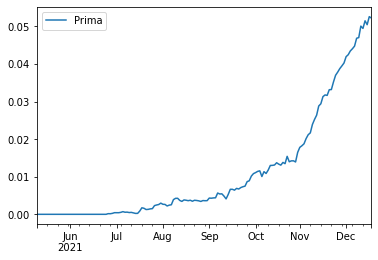

In [63]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
put_hist=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros([ndays,nscen])).T.mean()},index=dates)
put_hist.plot();

In [64]:
put_hist.iloc[-1]

Prima    0.052
Name: 2021-12-17 00:00:00, dtype: float64

In [65]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(-0.8832712913064822, 0.9876622023740915)


In [66]:
opt_valuar['JSON']['lastPrice']

0.8

El valor de la opción que estamos caluclando esta en el intervalo de confianza, por lo tanto los resultados obtenidos son muy confiables. La prima calculada pra la opción de McDOnald's es de 0.052 si nos basamos en los rendimientos calculados con el histograma y de 0.039 calculando los rendimientos de manera "normal".

### Black-Scholes

In [68]:
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

dates = pd.date_range(start=today, end=expiry, freq='B')

ndays = len(dates)
nscen = 10

len(dates)

160

In [69]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-05-10,0.032,0.007,0.028,...,-0.011,-0.018,-0.012
2021-05-11,0.052,0.020,0.033,...,0.007,-0.010,-0.020
2021-05-12,0.040,0.017,0.025,...,-0.009,-0.027,-0.016
2021-05-13,0.039,0.011,0.014,...,-0.014,-0.031,-0.007
2021-05-14,0.007,0.011,0.023,...,-0.020,-0.037,-0.011
...,...,...,...,...,...,...,...
2021-12-13,-0.090,-0.258,-0.248,...,-0.165,-0.223,-0.092
2021-12-14,-0.096,-0.262,-0.272,...,-0.213,-0.215,-0.087
2021-12-15,-0.092,-0.272,-0.275,...,-0.219,-0.195,-0.058
2021-12-16,-0.062,-0.249,-0.276,...,-0.216,-0.184,-0.029


In [79]:
S0 = closes_mcd.iloc[-1]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0,:] = S0
sim_closes

,0,1,2,...,7,8,9
2021-05-10,234.840,234.840,234.840,...,234.840,234.840,234.840
2021-05-11,247.389,239.688,242.603,...,236.496,232.602,230.104
2021-05-12,244.396,238.934,240.757,...,232.752,228.587,231.025
2021-05-13,244.267,237.323,238.101,...,231.643,227.610,233.286
2021-05-14,236.418,237.379,240.416,...,230.230,226.245,232.294
...,...,...,...,...,...,...,...
2021-12-13,214.714,181.396,183.310,...,199.101,187.978,214.108
2021-12-14,213.253,180.740,178.882,...,189.710,189.334,215.332
2021-12-15,214.116,178.969,178.416,...,188.637,193.161,221.606
2021-12-16,220.662,183.152,178.205,...,189.199,195.390,228.017


In [78]:
closes_mcd.iloc[-1]

234.83999633789062

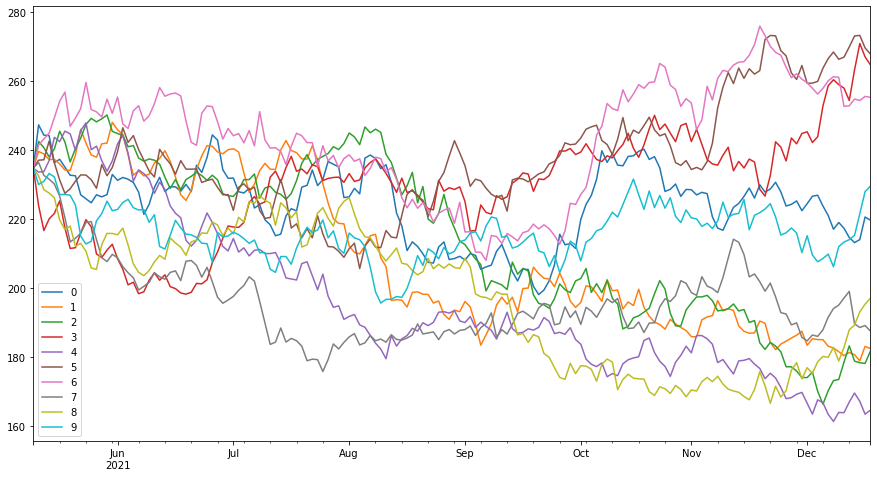

In [80]:
sim_closes.plot(figsize=(15,8));

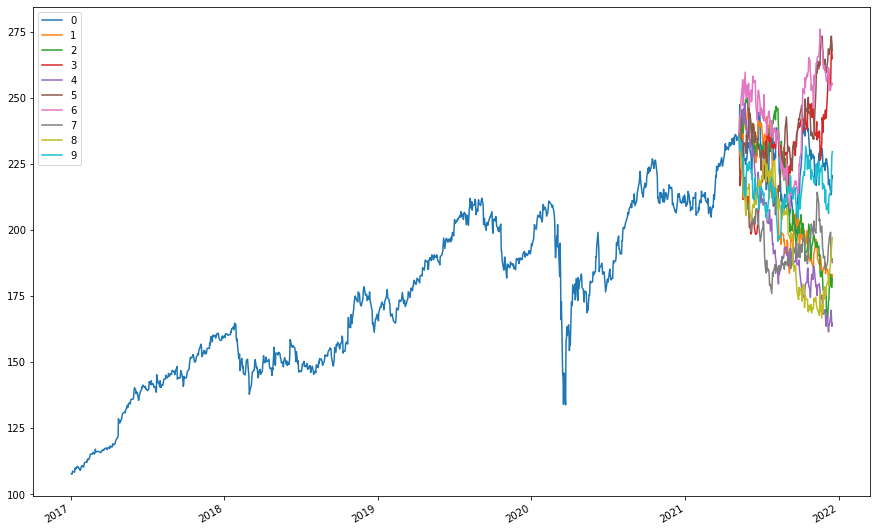

In [83]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_mcd,sim_closes]).plot(figsize=(15,10));

In [86]:
from datetime import date
Hoy = date.today()

# strike price
K = opt_valuar['JSON']['strike']  

# Fechas a simular
dates = pd.date_range(start= Hoy, periods = ndays, freq='B')

# Escenarios y número de días
ndays = len(dates)
nscen = 100000

# Condición inicial del precio a simular
S0 = closes_mcd.iloc[-1]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

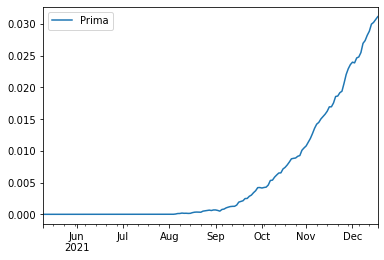

In [87]:
# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)

# Valor del put europeo
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,0).mean(axis=1)}, index=dates)
put.plot();

In [88]:
put.iloc[-1]

Prima    0.031
Name: 2021-12-17 00:00:00, dtype: float64

In [89]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(-0.35727861034468805, 0.4195912144192557)


#### Conclusión

El valor de la opción que estamos caluclando esta en el intervalo de confianza, por lo tanto los resultados obtenidos son muy confiables. La prima calculada pra la opción de McDonald's es de 0.052 si nos basamos en los rendimientos calculados con el histograma y de 0.039 calculando los rendimientos de manera "normal".

El valor encontrado con Black-Scholes es de 0.031 con un intervalo de confianza del 95%.

Podemos Asumir que los precios de la prima de la opcion put para McDonalds encontrado con los tres métodos está en un rango de 0.031 y 0.052, siendo el primero el encontrado con Black-Scholes y el último con el histograma. Todos ellos con un intervalo de confianza del 95%.

### LINK REPOSITORIO
[Link repositorio Github](https://github.com/danielperhez/Tarea9_CPerez)